<h1><br>One Hot Encoding</h1></br>

In [1]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
                   'points': [25, 12, 15, 14, 19, 23, 25, 29]})

#view DataFrame
print(df)

  team  points
0    A      25
1    A      12
2    B      15
3    B      14
4    B      19
5    B      23
6    C      25
7    C      29


In [2]:
!pip install sklearn

In [3]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['team']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

#view final df
print(final_df)

  team  points    0    1    2
0    A      25  1.0  0.0  0.0
1    A      12  1.0  0.0  0.0
2    B      15  0.0  1.0  0.0
3    B      14  0.0  1.0  0.0
4    B      19  0.0  1.0  0.0
5    B      23  0.0  1.0  0.0
6    C      25  0.0  0.0  1.0
7    C      29  0.0  0.0  1.0


<h1><br>Bag of WOrds (BoW)</h1></br>

In [4]:
#Creating frequency distribution of words using nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
text="""Achievers are not afraid of Challenges, rather they relish them, thrive in them, use them. Challenges makes is stronger.
        Challenges makes us uncomfortable. If you get comfortable with uncomfort then you will grow. Challenge the challenge """

In [6]:
#Tokenize the sentences from the text corpus
tokenized_text=sent_tokenize(text)#using CountVectorizer and removing stopwords in english language
cv1= CountVectorizer(lowercase=True,stop_words='english')#fitting the tonized senetnecs to the countvectorizer
text_counts=cv1.fit_transform(tokenized_text)

In [7]:
# printing the vocabulary and the frequency distribution pf vocabulary in tokinzed sentences
print(cv1.vocabulary_)
print(text_counts.toarray())

{'achievers': 0, 'afraid': 1, 'challenges': 3, 'relish': 7, 'thrive': 9, 'use': 12, 'makes': 6, 'stronger': 8, 'uncomfortable': 11, 'comfortable': 4, 'uncomfort': 10, 'grow': 5, 'challenge': 2}
[[1 1 0 1 0 0 0 1 0 1 0 0 1]
 [0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0]]


<h1><br>TF-IDF (Term Frequency-Inverse Document Frequency)</h1></br>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The cycle is ridden on the track.",
	"The bus is driven on the road.",
	"He is driving the bus."]

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 9, 'cycle': 1, 'is': 5, 'ridden': 7, 'on': 6, 'track': 10, 'bus': 0, 'driven': 2, 'road': 8, 'he': 4, 'driving': 3}
[1.28768207 1.69314718 1.69314718 1.69314718 1.69314718 1.
 1.28768207 1.69314718 1.69314718 1.         1.69314718]


<h1><br>Word2Vec</h1></br>

In [1]:
!pip install sklearn

In [2]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
 
nltk.download("brown")
 

[nltk_data] Downloading package brown to /home/ai-sajjan/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
    new_sent = []
    for word in sent:
        new_word = word.lower()
        if new_word[0] not in string.punctuation:
            new_sent.append(new_word)
    if len(new_sent) > 0:
        data.append(new_sent)

In [4]:
# Creating Word2Vec
model = Word2Vec(
    sentences = data,
    vector_size = 50,
    window = 10,
    epochs = 50,
)

In [5]:
# Vector for word love
print("Vector for love:")
print(model.wv["love"])
print()

Vector for love:
[ 1.4435498  -0.95813555 -4.037325   -1.6593615   0.83022314  0.7985688
  1.6163225  -3.9775276  -0.79810977 -5.5277724   0.8144005  -2.3735604
 -0.45716262 -0.35062587 -0.92908454 -2.2068043  -1.29685    -1.094274
  1.6944438  -1.325186    1.6559923  -1.4766303  -0.2529122   5.1529417
 -1.5867829   3.0928686  -4.942659    5.1006255   2.097456   -1.3127035
 -2.0912752   2.585391   -1.2894511   1.4629898  -1.2686738   0.34790617
 -1.9468209  -0.22427462 -0.51461685  3.095023    0.621125   -2.2638757
  0.10592806  0.85524136  2.178865   -2.9855556  -0.26998365 -3.6165426
 -1.3097097  -1.651824  ]



In [15]:
# Finding most similar words
print("3 words similar to car")
words = model.wv.most_similar("car", topn=8)
for word in words:
    print(word)
print()
 

3 words similar to car
('boat', 0.634186863899231)
('luggage', 0.6238476037979126)
('truck', 0.6107639670372009)
('flashlight', 0.596070408821106)
('block', 0.5960060358047485)
('train', 0.5777391791343689)
('headlights', 0.5710310339927673)
('yards', 0.5689948797225952)



In [16]:
#Visualizing data
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

In [17]:
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

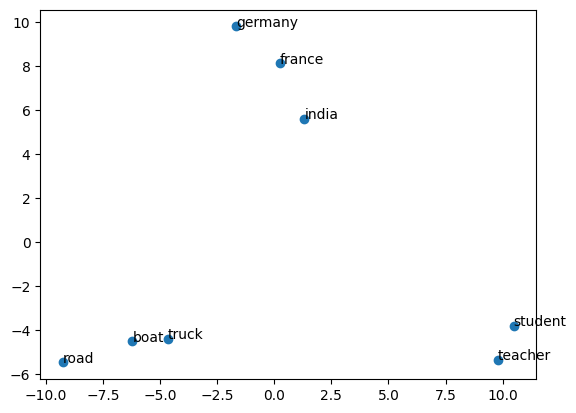

In [18]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

<h1><br>Loading pre-trained model</h1></br>

In [26]:
import gensim
import gensim.downloader
 
for model_name in list(gensim.downloader.info()['models'].keys()):
  print(model_name)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [ ]:
import gensim
import gensim.downloader
 
google_news_vectors = gensim.downloader.load('word2vec-google-news-300')

[================----------------------------------] 32.1% 534.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.8% 1211.3/1662.8MB downloaded

In [ ]:
# Finding Capital of Britain given Capital of France: (Paris - France) + Britain = 
print("Finding Capital of Britain: (Paris - France) + Britain")
capital = google_news_vectors.most_similar(["Paris", "Britain"], ["France"], topn=1)
print(capital)
print()

In [ ]:
# Finding Capital of India given Capital of Germany: (Berlin - Germany) + India = 
print("Finding Capital of India: (Berlin - Germany) + India")
capital = google_news_vectors.most_similar(["Berlin", "India"], ["Germany"], topn=1)
print(capital)
print()

In [35]:
# Finding words similar to BMW
print("5 similar words to BMW:")
words = google_news_vectors.most_similar("BMW", topn=5)
for word in words:
    print(word)
print()

5 similar words to BMW:
('Audi', 0.7932199835777283)
('Mercedes_Benz', 0.7683466672897339)
('Porsche', 0.7272197604179382)
('Mercedes', 0.7078384160995483)
('Volkswagen', 0.6959410905838013)



In [36]:
# Finding words similar to Beautiful
print("3 similar words to beautiful:")
words = google_news_vectors.most_similar("beautiful", topn=3)
for word in words:
      print(word)
print()

3 similar words to beautiful:
('gorgeous', 0.8353005051612854)
('lovely', 0.8106936812400818)
('stunningly_beautiful', 0.7329413294792175)



In [37]:
# Finding cosine similarity between fight and battle
cosine = google_news_vectors.similarity("fight", "battle")
print("Cosine similarity between fight and battle:", cosine)
print()

Cosine similarity between fight and battle: 0.7021284



In [38]:
# Finding cosine similarity between fight and love
cosine = google_news_vectors.similarity("fight", "love")
print("Cosine similarity between fight and love:", cosine)

Cosine similarity between fight and love: 0.13506128


<h1><br>Training word2vec model on new data</h1></br>

In [1]:
# importing libraries
import string
from gensim import corpora
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
#read txt file
f = open("E:\\nltk\\news.txt", "r").read()

In [4]:
word = word_tokenize(f)

In [5]:
# creating tokens
token_list = [word_tokenize(sent.translate(str.maketrans(
    '', '', string.punctuation))) for sent in word]

In [6]:
token_list

[['Netherlands'],
 ['scored'],
 ['twice'],
 ['in'],
 ['the'],
 ['final'],
 ['minutes'],
 ['through'],
 ['Cody'],
 ['Gakpo'],
 ['and'],
 ['substitute'],
 ['Davy'],
 ['Klaassen'],
 ['to'],
 ['beat'],
 ['Senegal'],
 ['20'],
 ['in'],
 ['their'],
 ['World'],
 ['Cup'],
 ['Group'],
 ['A'],
 ['match'],
 ['at'],
 ['Al'],
 ['Thumama'],
 ['Stadium'],
 ['on'],
 ['Monday'],
 [],
 ['The'],
 ['Dutch'],
 [],
 ['who'],
 ['missed'],
 ['out'],
 ['on'],
 ['the'],
 ['2018'],
 ['World'],
 ['Cup'],
 [],
 ['looked'],
 ['to'],
 ['be'],
 ['heading'],
 ['for'],
 ['a'],
 ['scrappy'],
 ['goalless'],
 ['draw'],
 ['after'],
 ['wasting'],
 ['several'],
 ['good'],
 ['chances'],
 ['but'],
 ['manofthematch'],
 ['Gakpo'],
 ['beat'],
 ['keeper'],
 ['Edouard'],
 ['Mendy'],
 ['and'],
 ['nod'],
 ['in'],
 ['a'],
 ['deep'],
 ['Frenkie'],
 ['De'],
 ['Jong'],
 ['cross'],
 ['with'],
 ['the'],
 ['back'],
 ['of'],
 ['his'],
 ['headKlaassen'],
 ['then'],
 ['pounced'],
 ['on'],
 ['a'],
 ['weak'],
 ['Mendy'],
 ['save'],
 ['to'],
 ['sc

In [7]:
# data preprocess
data = []
for sent in token_list:
    new_sent = []
    for word in sent:
        new_word = word.lower()
        if new_word[0] not in string.punctuation:
            new_sent.append(new_word)
    if len(new_sent) > 0:
        data.append(new_sent)

In [8]:
data

[['netherlands'],
 ['scored'],
 ['twice'],
 ['in'],
 ['the'],
 ['final'],
 ['minutes'],
 ['through'],
 ['cody'],
 ['gakpo'],
 ['and'],
 ['substitute'],
 ['davy'],
 ['klaassen'],
 ['to'],
 ['beat'],
 ['senegal'],
 ['20'],
 ['in'],
 ['their'],
 ['world'],
 ['cup'],
 ['group'],
 ['a'],
 ['match'],
 ['at'],
 ['al'],
 ['thumama'],
 ['stadium'],
 ['on'],
 ['monday'],
 ['the'],
 ['dutch'],
 ['who'],
 ['missed'],
 ['out'],
 ['on'],
 ['the'],
 ['2018'],
 ['world'],
 ['cup'],
 ['looked'],
 ['to'],
 ['be'],
 ['heading'],
 ['for'],
 ['a'],
 ['scrappy'],
 ['goalless'],
 ['draw'],
 ['after'],
 ['wasting'],
 ['several'],
 ['good'],
 ['chances'],
 ['but'],
 ['manofthematch'],
 ['gakpo'],
 ['beat'],
 ['keeper'],
 ['edouard'],
 ['mendy'],
 ['and'],
 ['nod'],
 ['in'],
 ['a'],
 ['deep'],
 ['frenkie'],
 ['de'],
 ['jong'],
 ['cross'],
 ['with'],
 ['the'],
 ['back'],
 ['of'],
 ['his'],
 ['headklaassen'],
 ['then'],
 ['pounced'],
 ['on'],
 ['a'],
 ['weak'],
 ['mendy'],
 ['save'],
 ['to'],
 ['score'],
 ['on'],

In [9]:
# Creating Word2Vec
model = Word2Vec(
    sentences = data,
    vector_size = 100,
    window = 5,
    alpha=0.03, min_alpha=0.007,
    epochs = 500,
)

In [10]:
# Vector for words
print("Vector for a word:")
print(model.wv["minutes"])
print()

Vector for a word:
[ 8.3489111e-03 -5.7309150e-04 -9.4367787e-03  4.7836374e-03
 -6.0451389e-03  6.6814926e-03  5.3737783e-03 -5.0456738e-03
  2.5694275e-03  5.4166410e-03 -3.5853053e-03 -1.5160346e-03
  9.1695711e-03  9.0632085e-03 -9.3929647e-03  7.5673079e-03
  9.8880483e-03 -2.8401709e-03  2.4593449e-03 -2.8033520e-03
  8.6454442e-03 -2.8328420e-04  5.6363083e-03  9.2128944e-03
  4.1102455e-03 -7.1203900e-03 -1.9258308e-03  9.7802398e-04
  2.0340753e-03  2.9542136e-03  9.4493581e-03  4.4010999e-03
  9.9138999e-03 -8.6577032e-03 -5.7544159e-03  1.9863057e-03
  3.6561727e-03 -9.9117996e-04 -6.9116498e-03 -3.2116629e-03
 -8.5275723e-03  9.4107129e-03  3.7244344e-03 -7.8794193e-03
  3.1869675e-03  4.1738343e-03 -5.6389854e-03 -5.9127929e-03
  1.0383654e-03  8.9620445e-03 -9.6462825e-03  6.2894819e-06
 -6.8649459e-03 -9.3225000e-04  3.0410003e-03 -5.0299671e-03
 -2.7760053e-03  6.7558768e-04 -6.3622212e-03  7.2865770e-03
  4.3784212e-03 -8.5585359e-03 -2.1489717e-03  3.1645298e-03
 -8.3

In [11]:
print(model.wv["tottenham"])

[ 9.7702928e-03  8.1651136e-03  1.2809705e-03  5.0975773e-03
  1.4081288e-03 -6.4551616e-03 -1.4280510e-03  6.4491653e-03
 -4.6173073e-03 -3.9930656e-03  4.9244044e-03  2.7130984e-03
 -1.8479753e-03 -2.8769446e-03  6.0107303e-03 -5.7167388e-03
 -3.2367038e-03 -6.4878250e-03 -4.2346334e-03 -8.5809948e-03
 -4.4697905e-03 -8.5112313e-03  1.4037776e-03 -8.6181974e-03
 -9.9166557e-03 -8.2016252e-03 -6.7726658e-03  6.6805840e-03
  3.7845564e-03  3.5616636e-04 -2.9579829e-03 -7.4283220e-03
  5.3341867e-04  4.9989222e-04  1.9561767e-04  8.5259438e-04
  7.8633073e-04 -6.8161491e-05 -8.0070542e-03 -5.8702733e-03
 -8.3829118e-03 -1.3120436e-03  1.8206357e-03  7.4171280e-03
 -1.9634271e-03 -2.3252917e-03  9.4871549e-03  7.9703328e-05
 -2.4045228e-03  8.6048460e-03  2.6870037e-03 -5.3439736e-03
  6.5881060e-03  4.5101522e-03 -7.0544672e-03 -3.2317400e-04
  8.3448651e-04  5.7473565e-03 -1.7176557e-03 -2.8065301e-03
  1.7484308e-03  8.4717036e-04  1.1928272e-03 -2.6342822e-03
 -5.9857843e-03  7.32298

In [12]:
print(model.wv["goalklaassen"])

KeyError: "Key 'goalklaassen' not present"

In [13]:
# add new words to vocab
docs = [['potoatoes', 'and', 'goalklaassen', 'champions']]   
model = Word2Vec(data, vector_size = 100, window = 5, min_count = 1, workers = 4)
  
model.train(docs, total_examples = len(docs), epochs = 10)

(25, 40)

In [14]:
print(model.wv["goalklaassen"])

[-0.00348587  0.00529505  0.00317912 -0.00103954  0.00411428 -0.00426439
 -0.00316489 -0.00683669 -0.00342667 -0.00747414  0.00589782  0.00603283
 -0.00430634 -0.00701464 -0.00879238 -0.00202594 -0.00063703  0.0011224
  0.00247295  0.00514676 -0.00550599  0.00552961 -0.00682853  0.00982894
  0.00717243 -0.00699021  0.00508616 -0.00512325 -0.00046802 -0.00723437
 -0.00598069 -0.00807205 -0.00525782 -0.00870431  0.00390014 -0.00622463
 -0.00872562 -0.00698875 -0.00967487 -0.00137581  0.00642891  0.00158254
 -0.00809942 -0.00247536 -0.00256665 -0.00927327 -0.00643291  0.0086121
 -0.0029237  -0.00888632 -0.0001455  -0.00717902 -0.004617   -0.00584798
  0.00323896 -0.00554011  0.00486936 -0.00544539  0.00790769  0.008656
  0.00062329 -0.00407931 -0.00371143  0.00792186  0.00971215 -0.00577874
 -0.00908539  0.000124   -0.00676532  0.00857382  0.00239411 -0.00778626
 -0.00300937 -0.00067936  0.00757071 -0.00187726 -0.00851838 -0.0046647
  0.00292026  0.00130368 -0.00829571  0.00720831 -0.0035

In [17]:
#save word2vec model to disk
model.save('E:\\nltk\\w2vmodel\\word_to_vec_model_ne')

In [19]:
#load word2vec model from disk
from gensim import models
w2v = Word2Vec.load("E:\\nltk\\w2vmodel\\word_to_vec_model_ne")

In [20]:
print(w2v.wv["champions"])

[-2.9374650e-03  4.9309400e-03 -1.6468051e-03 -9.2378790e-03
 -3.2613243e-03  6.8796836e-03  5.2713258e-03  4.4340622e-03
  6.1767078e-03 -9.1478340e-03  1.0949480e-03  3.9516236e-03
 -2.4619384e-03 -2.7835099e-03  6.3718725e-03 -8.5270209e-03
  3.3510732e-03  4.1571097e-03  2.0504871e-03  3.8973168e-03
 -6.6591608e-03  2.4582597e-03 -1.5297218e-03 -3.7418595e-03
  8.8657374e-03 -7.4834223e-03 -7.5132693e-03 -5.9283669e-03
 -8.9152809e-03 -1.8903678e-03 -8.7861177e-03 -4.3220893e-03
  5.8740410e-03 -2.2746657e-03 -6.0198265e-03 -3.7438646e-03
 -7.1618827e-03  8.5103530e-03  3.6387376e-03 -4.7239046e-05
  9.7016850e-03  7.4854088e-03 -5.3673149e-03 -7.8829778e-03
  6.0268766e-03  5.8968929e-03 -2.6070874e-03  5.6245341e-03
  8.7882839e-03  2.8933897e-03 -5.7427529e-03 -1.2081203e-03
 -7.1530486e-03  8.0606025e-03 -4.6996265e-03  4.0781684e-03
  6.1082309e-03 -8.1744575e-04 -1.9970436e-04  7.9192268e-03
 -4.7273184e-03  9.9136727e-03  4.1482011e-03  3.3735745e-03
 -2.6751547e-03 -3.25661

<h1><br>GloVe</h1><br>

In [21]:
import gensim
import gensim.downloader
 
for model_name in list(gensim.downloader.info()['models'].keys()):
    print(model_name)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [22]:
import gensim
import gensim.downloader
 
google_news_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [23]:
# Finding similar words
capital = google_news_vectors.most_similar("love", topn=10)
print(capital)
print()

Finding Capital of Britain: (Paris - France) + Britain
[('loves', 0.6420262455940247), ('passion', 0.6261469125747681), ('loved', 0.595270574092865), ('romantic', 0.5921086072921753), ('lovers', 0.5904366970062256), ('lover', 0.5841912627220154), ('you', 0.5837852954864502), ('me', 0.5835772752761841), ('affection', 0.581821858882904), ('always', 0.5701122283935547)]



In [24]:
capital = google_news_vectors["love"]

In [25]:
capital

array([-4.5205e-01, -3.3122e-01, -6.3607e-02,  2.8325e-02, -2.1372e-01,
        1.6839e-01, -1.7186e-02,  4.7309e-02, -5.2355e-02, -9.8706e-01,
        5.3762e-01, -2.6893e-01, -5.4294e-01,  7.2487e-02,  6.6193e-02,
       -2.1814e-01, -1.2113e-01, -2.8832e-01,  4.8161e-01,  6.9185e-01,
       -2.0022e-01,  1.0082e+00, -1.1865e-01,  5.8710e-01,  1.8482e-01,
        4.5799e-02, -1.7836e-02, -3.3952e-01,  2.9314e-01, -1.9951e-01,
       -1.8930e-01,  4.3267e-01, -6.3181e-01, -2.9510e-01, -1.0547e+00,
        1.8231e-01, -4.5040e-01, -2.7800e-01, -1.4021e-01,  3.6785e-02,
        2.6487e-01, -6.6712e-01, -1.5204e-01, -3.5001e-01,  4.0864e-01,
       -7.3615e-02,  6.7630e-01,  1.8274e-01, -4.1660e-02,  1.5014e-02,
        2.5216e-01, -1.0109e-01,  3.1915e-02, -1.1298e-01, -4.0147e-01,
        1.7274e-01,  1.8497e-03,  2.4456e-01,  6.8777e-01, -2.7019e-01,
        8.0728e-01, -5.8296e-02,  4.0550e-01,  3.9893e-01, -9.1688e-02,
       -5.2080e-01,  2.4570e-01,  6.3001e-02,  2.1421e-01,  3.31